# Explore the DataFrame

We want to get a solid understanding of the structure of our DF and its values before jumping into a deeper analysis. <br>
We use many of pandas handy functions to begin with basic analysis for the data, including inspecting column data types <br> and distributions, creating exploratory visualizations, and counting unique and missing values. 

In [114]:
IS_TRAIN = True

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset into a DataFrame
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

# df = pd.concat([train, test], sort=False)
df = train.copy()
test_df = test.copy()

# Drop id column - id is not a feature
df = df.drop(['id'], axis=1)
test_df = test_df.drop(['id'], axis=1)

# Print the number of rows and columns
print("Number of rows and columns:", df.shape)

# Print the first 10 rows
df.head()

Number of rows and columns: (365, 11)


,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


## Understanding columns and values
The [info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) function prints a concise summary of the DataFrame. For each column, we can find its name, data type, and the number of non-null rows.<br>  This is useful to gauge if there are many missing values and to understand what data we are dealing with. 

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      365 non-null    int64  
 1   mnth        365 non-null    int64  
 2   holiday     365 non-null    int64  
 3   weekday     365 non-null    int64  
 4   workingday  365 non-null    int64  
 5   weathersit  365 non-null    int64  
 6   temp        365 non-null    float64
 7   atemp       365 non-null    float64
 8   hum         365 non-null    float64
 9   windspeed   365 non-null    float64
 10  cnt         365 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 31.5 KB


### Data Fields

id         - Unique ID for each entry (numeric) <br>
season     - 1 = spring, 2 = summer, 3 = fall, 4 = winter (categorial). <br>
mnth       - 1 = Januar ... 12 = December (numerical). <br>
holiday    - whether the day is considered a holiday (bool). <br>
weekday    - 0 = Sunday ... 6 = Saturday (numeric). <br>
workingday - whether the day is neither a weekend nor holiday (bool). <br>
weathersit - (categorial). <br>
             1 = Clear, Few clouds, Partly cloudy, Partly cloudy <br>
             2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>
             3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>
             4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>
temp       - temperature in Celsius (numeric). <br>
atemp      - "feels like" temperature in Celsius (numeric). <br>
humidity   - relative humidity (numeric). <br>
windspeed  - wind speed (numeric). <br>
count      - number of total rentals (numeric). <br>

The [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function generates helpful descriptive statistics for each numeric column. We can see the percentile, mean, standard deviation, and minimum and maximum values in its output.

In [116]:
df.describe()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.498630,6.526027,0.027397,3.008219,0.684932,1.421918,0.486665,0.466835,0.643665,0.191403,3405.761644
std,1.110946,3.452584,0.163462,2.006155,0.465181,0.571831,0.189596,0.168836,0.148744,0.076890,1378.753666
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,431.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.325000,0.321954,0.538333,0.135583,2132.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.479167,0.472846,0.647500,0.186900,3740.000000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.656667,0.612379,0.742083,0.235075,4586.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.849167,0.840896,0.972500,0.507463,6043.000000


To get an exact count of missing values in each column, we call the [isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) function and aggregate it using the [sum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) function:

In [117]:
df.isna().sum()

season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

We want to fix the scale of the data to be more precise for understand <br>
So, let multiply temp, atemp, hum and windspeed by 100

In [118]:
def multiply_column_by_multiplier(df, column, multiplier=100):
    df[column] = df[column] * multiplier
    return df

list_to_multiply = ['temp', 'atemp', 'hum', 'windspeed']
for column in list_to_multiply:
    df = multiply_column_by_multiplier(df, column)
    test_df = multiply_column_by_multiplier(test_df, column)

df.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,34.4167,36.3625,80.5833,16.0446,985
1,1,1,0,0,0,2,36.3478,35.3739,69.6087,24.8539,801
2,1,1,0,1,1,1,19.6364,18.9405,43.7273,24.8309,1349
3,1,1,0,2,1,1,20.0000,21.2122,59.0435,16.0296,1562
4,1,1,0,3,1,1,22.6957,22.9270,43.6957,18.6900,1600


In [119]:
def print_by_function(df, function):
    """Generic function to print the result of a function on a DataFrame"""
    print(f'Applying {function.__name__} function to the dataframe')
    for col in df.columns:
        returned_value = function(df[col])
        if len(returned_value) < 20:
            print(col, returned_value, end='\n')

We can explore the unique values of each columns by calling the [unique()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html) function.

In [120]:
print_by_function(df, pd.unique)

Applying unique function to the dataframe
season [1 2 3 4]
mnth [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday [0 1]
weekday [6 0 1 2 3 4 5]
workingday [0 1]
weathersit [2 1 3]


We use the [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) function to print out the number of rows for each unique value:

In [121]:
print_by_function(df, pd.value_counts)

Applying value_counts function to the dataframe
season 3    94
2    92
1    90
4    89
Name: season, dtype: int64
mnth 1     31
3     31
5     31
7     31
8     31
10    31
12    31
4     30
6     30
9     30
11    30
2     28
Name: mnth, dtype: int64
holiday 0    355
1     10
Name: holiday, dtype: int64
weekday 6    53
0    52
1    52
2    52
3    52
4    52
5    52
Name: weekday, dtype: int64
workingday 1    250
0    115
Name: workingday, dtype: int64
weathersit 1    226
2    124
3     15
Name: weathersit, dtype: int64


## Basic data visualizations

Boxplots can help you identify outliers:

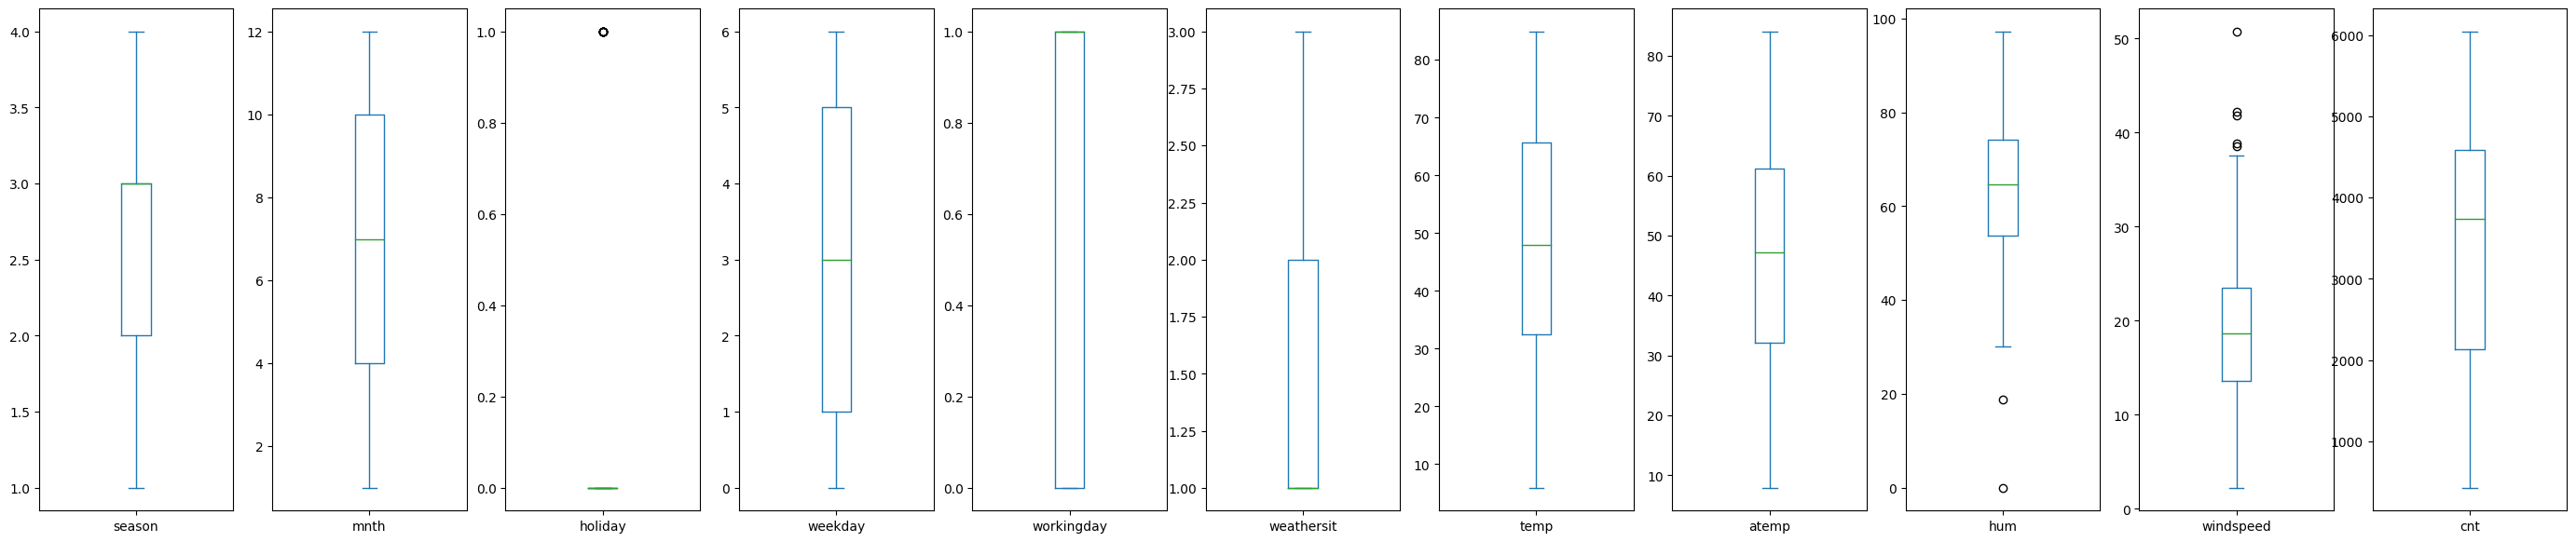

In [122]:
df.plot(kind="box", figsize=(35, 7), subplots=True, sharex=False, sharey=False);

We can see that most of our data is in well formed structure and the outliers mostly resides at 'hum' and 'windspead' columns. (later we deal 
with them).

Let Explore the data useing histograms - this will tell us more about the distribution of the data

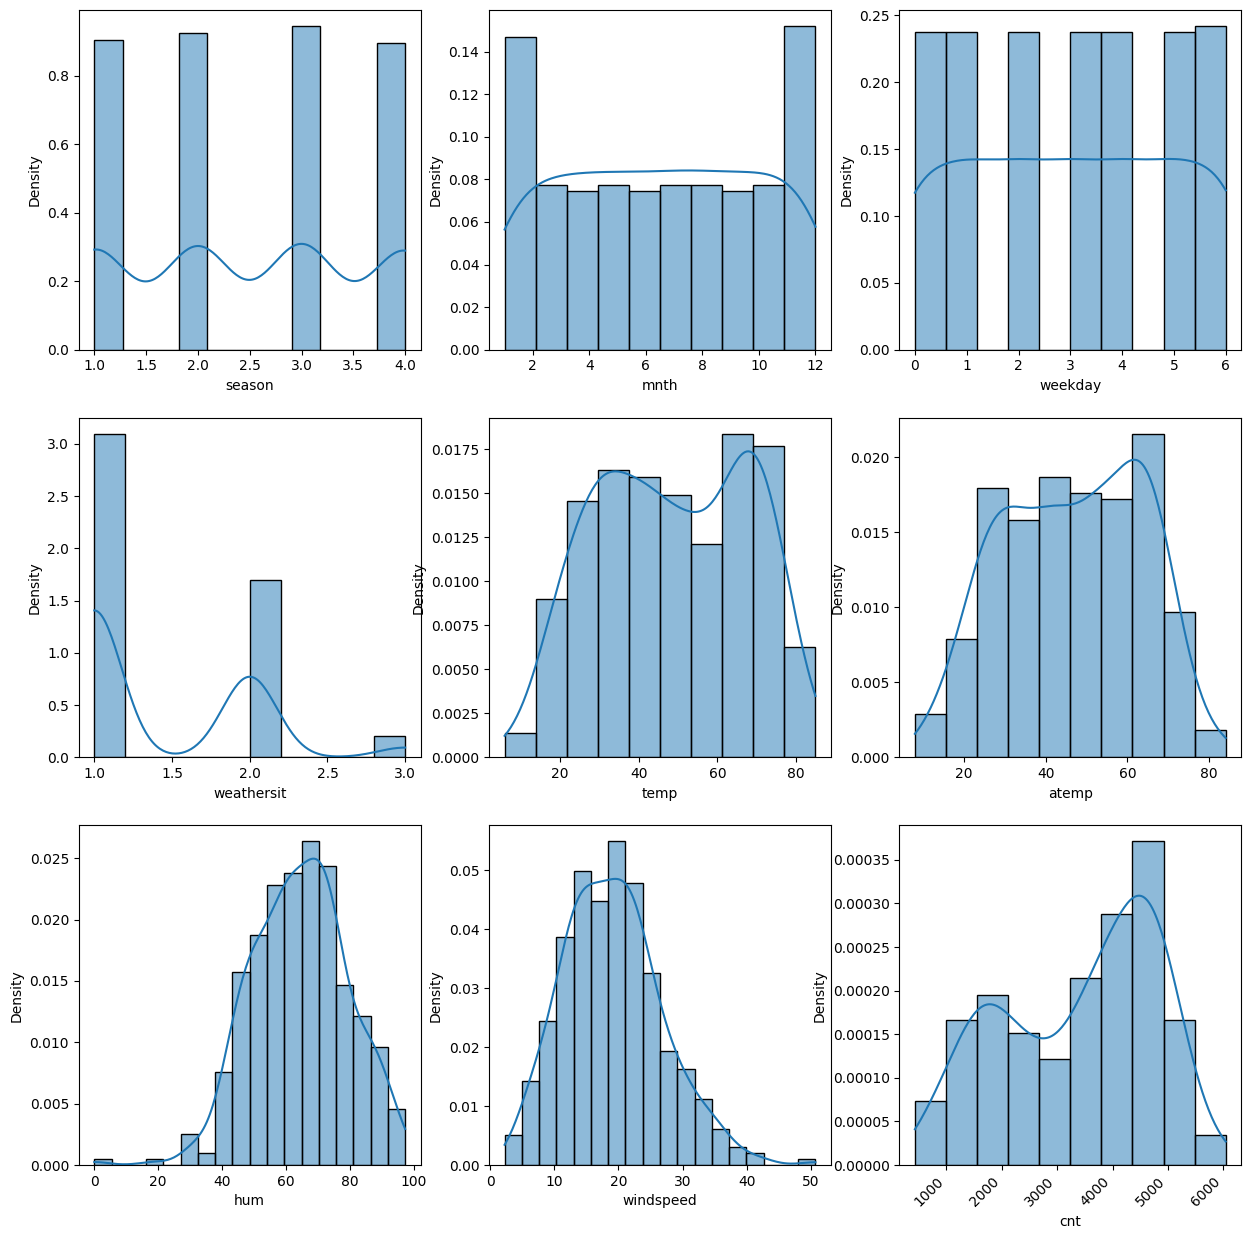

In [123]:
# Lets remove bool columns - histogram is not informative on bool columns
bool_collist = ['holiday', 'workingday']
numeric_df = df.drop(bool_collist, axis=1)

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=len(numeric_df.columns) // 3, ncols=3, figsize=(15, 15))
axes = axes.ravel()  # flattening the array makes indexing easier

for col, axis in zip(numeric_df.columns, axes):
    sns.histplot(data=numeric_df, x=col, ax=axis, kde=True, stat='density')
    # allgin the x axis labels
    plt.xticks(rotation=45, ha='right')

plt.show()

Most of the columns normally distribute  - we will use this info later when start dealing with the data. 

Let's compare the mean rental rate over the weekday/mnth/season

In [124]:
def plot_agg_against_target(df, agg_func, target_col, agg_col):
    """Plot the aggregation of a column against the target column"""
    agg_df = df.groupby(agg_col)[target_col].agg(agg_func)
    agg_df.plot(
        kind='bar',
        figsize=(5, 5),
        title=f'{agg_func.__name__} of {target_col} against {agg_col}',
        );

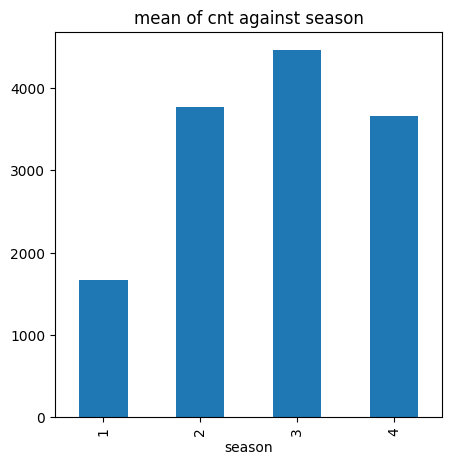

In [125]:
if IS_TRAIN:
    # Plot the mean of the target column against the season column
    plot_agg_against_target(df, np.mean, 'cnt', 'season')

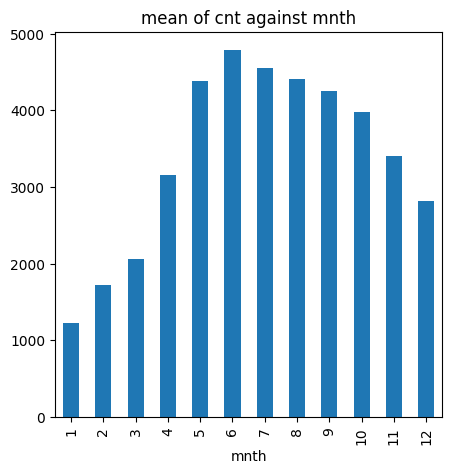

In [126]:
if IS_TRAIN:
    # Plot the mean of the target column against the mnth column
    plot_agg_against_target(df, np.mean, 'cnt', 'mnth')

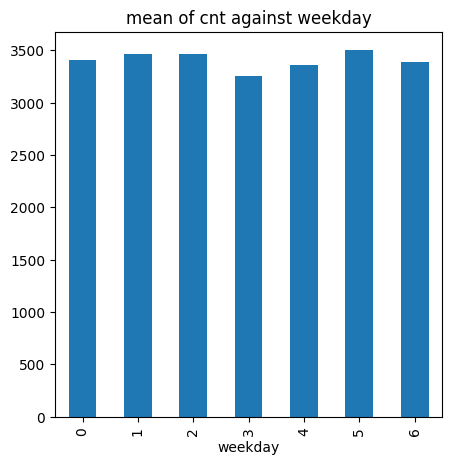

In [127]:
if IS_TRAIN:
    # Plot the mean of the target column against the weekday column
    plot_agg_against_target(df, np.mean, 'cnt', 'weekday')

Notice that as expected - the 'strong' months are the ones at summertime.

To further explore relationships between columns we generate a correlation matrix using <br>  pandas' [corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) function and a plot it with Seaborn's [heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function.

              season      mnth   holiday   weekday  workingday  weathersit  \
season      1.000000  0.831032  0.000207 -0.011705    0.007137    0.035508   
mnth        0.831032  1.000000  0.032808  0.012860   -0.004288    0.009729   
holiday     0.000207  0.032808  1.000000 -0.076087   -0.247461   -0.006442   
weekday    -0.011705  0.012860 -0.076087  1.000000    0.020445    0.047259   
workingday  0.007137 -0.004288 -0.247461  0.020445    1.000000    0.108654   
weathersit  0.035508  0.009729 -0.006442  0.047259    0.108654    1.000000   
temp        0.373380  0.288663 -0.019272 -0.039292    0.046799   -0.091175   
atemp       0.382972  0.301920 -0.026448 -0.042810    0.046158   -0.096894   
hum         0.249451  0.242533 -0.030896 -0.065932    0.034250    0.581476   
windspeed  -0.242514 -0.242443  0.000734  0.061525    0.011955    0.109310   
cnt         0.541794  0.444607 -0.049193 -0.004396    0.020661   -0.318274   

                temp     atemp       hum  windspeed       cnt  

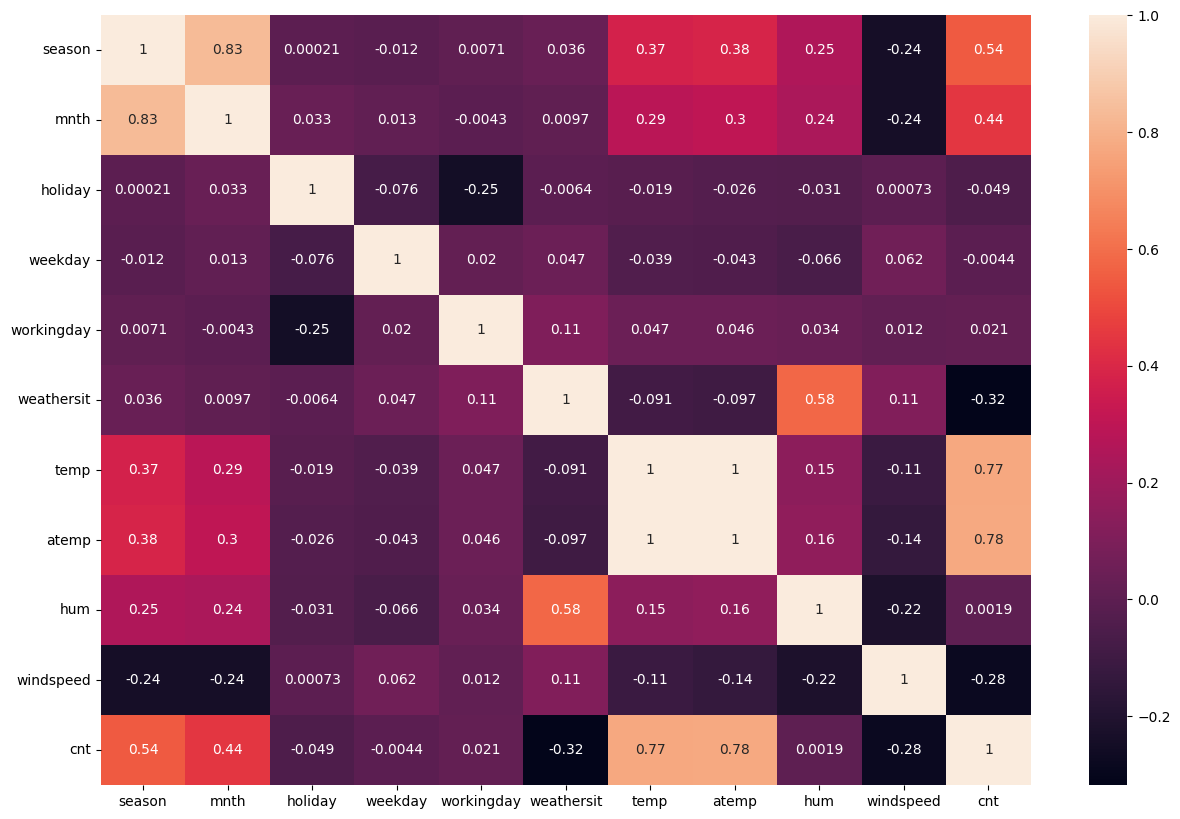

In [128]:
# Generate and print pairwise correlation of columns
cm = df.corr()
print(cm)

# Plot the correlation matrix nicely using Seaborn
plt.figure(figsize = (15,10))
sns.heatmap(cm, annot=True);
plt.show()

As expected - we can see there is a negative correlation between 'weathersit'/'windspeed'/'hum' and 'cnt'. This can be expectas as the weather getting worst the number of rented bikes would decrease.

Change categorical and bool data type for memory reduction¶

In [129]:
categorical_features = ['season', 'holiday', 'workingday', 'mnth', 'weekday', 'weathersit']

for feature in categorical_features:
    df[feature] = df[feature].astype("category")
    test_df[feature] = test_df[feature].astype("category")
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      365 non-null    category
 1   mnth        365 non-null    category
 2   holiday     365 non-null    category
 3   weekday     365 non-null    category
 4   workingday  365 non-null    category
 5   weathersit  365 non-null    category
 6   temp        365 non-null    float64 
 7   atemp       365 non-null    float64 
 8   hum         365 non-null    float64 
 9   windspeed   365 non-null    float64 
 10  cnt         365 non-null    int64   
dtypes: category(6), float64(4), int64(1)
memory usage: 17.8 KB


In [130]:
# Convert the categorical features to dummy variables
# weather
weather = pd.get_dummies(df['weathersit'], prefix='weather')
df = pd.concat([weather, df], axis=1)

weather = pd.get_dummies(test_df['weathersit'], prefix='weather')
test_df = pd.concat([weather, test_df], axis=1)

# # same for season
# season = pd.get_dummies(df['season'], prefix='season')
# df = pd.concat([season, df], axis=1)

# season = pd.get_dummies(test_df['season'], prefix='season')
# test_df = pd.concat([season, test_df], axis=1)

# # same for month
# mnth=pd.get_dummies(df['mnth'], prefix='month')
# df=pd.concat([df, mnth], axis=1)

# mnth=pd.get_dummies(test_df['mnth'], prefix='month')
# test_df=pd.concat([test_df, mnth], axis=1)

# now can drop useless columns
# drop_columns = ['weathersit', 'season', 'holiday']
drop_columns = ['holiday', 'weathersit',]
df.drop(drop_columns,
        inplace=True,
        axis=1
        )

test_df.drop(drop_columns,
             inplace=True,
             axis=1
             )


Converting the df features to fit their right dtypes

In [131]:
df = df.convert_dtypes()
test_df = test_df.convert_dtypes()

for feature in df.columns:
    if df[feature].dtype == 'UInt8':
        df[feature] = df[feature].astype('boolean')
        test_df[feature] = test_df[feature].astype('boolean')

<AxesSubplot:>

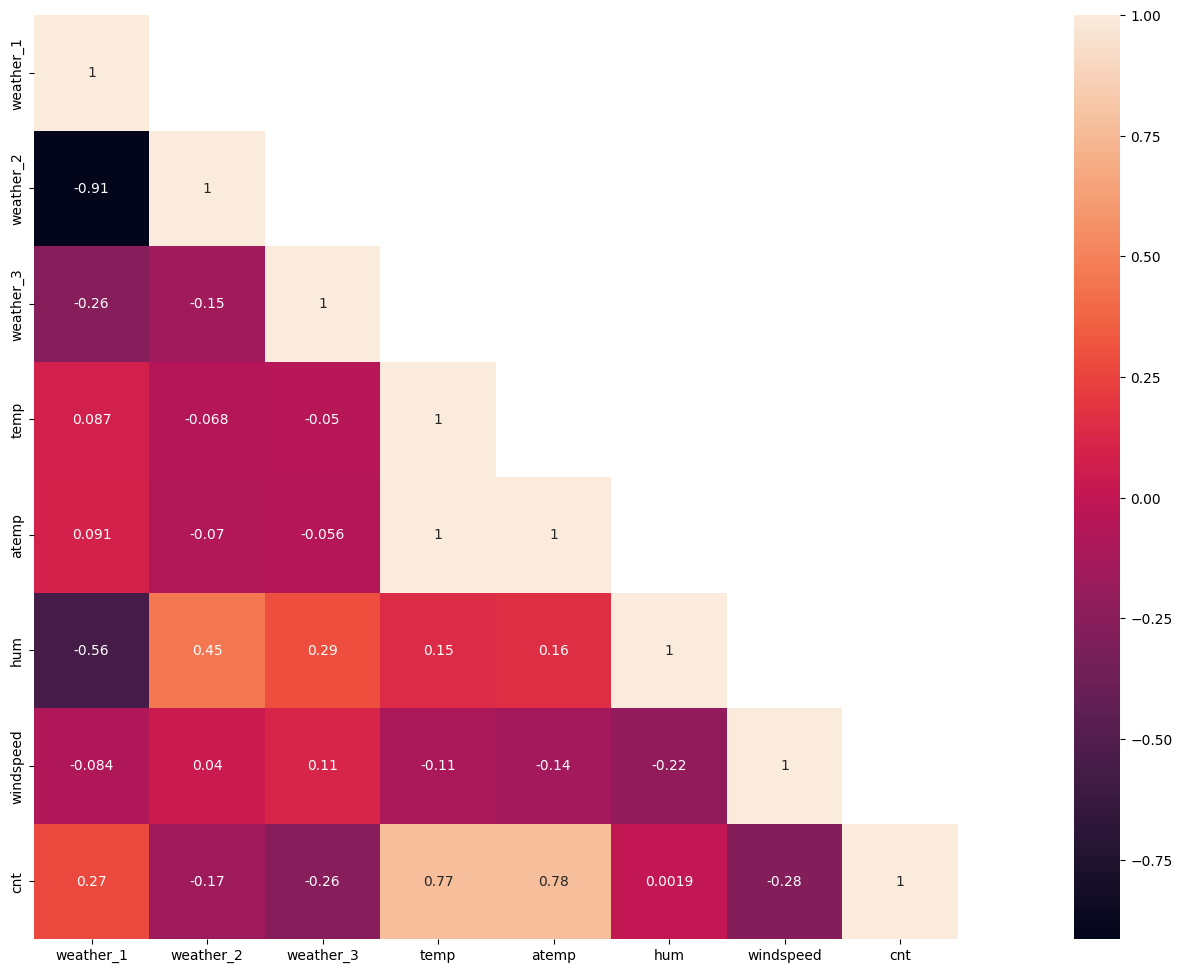

In [132]:
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,
            mask=mask,
            square=True,
            annot=True,
            cbar=True)

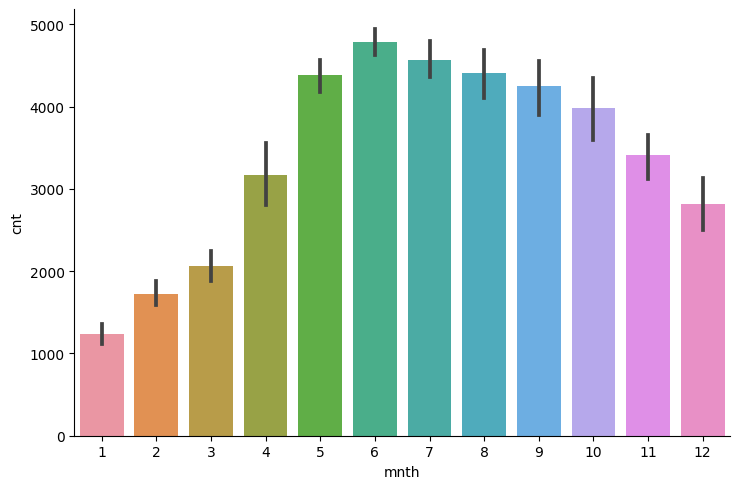

In [133]:
sns.factorplot(x="mnth",y="cnt",data=df,kind='bar',size=5,aspect=1.5)

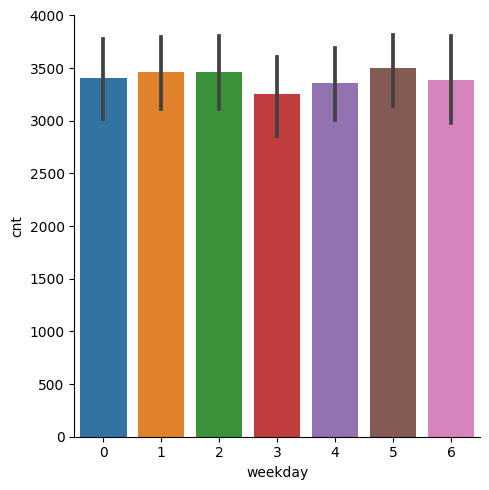

In [134]:
sns.factorplot(x="weekday", y='cnt', kind='bar', data=df, size=5, aspect=1)

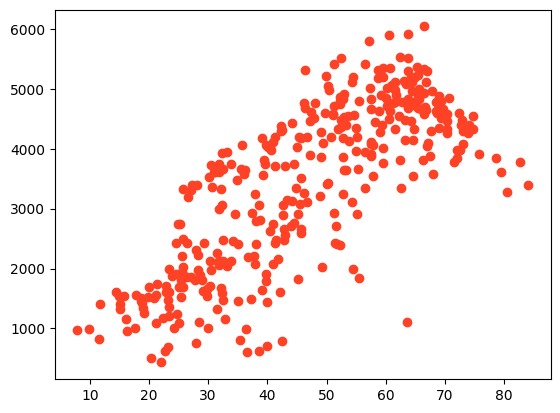

In [135]:
plt.scatter(x="atemp", y="cnt", data=df, color='#ff4125')

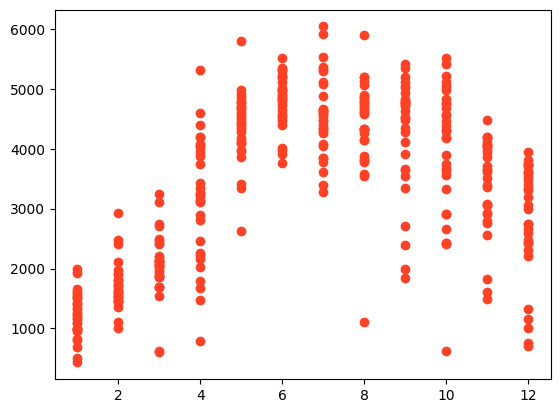

In [136]:
plt.scatter(x="mnth", y="cnt", data=df, color='#ff4125')

Lets try fix the outliers in mnth and weekdays features

In [137]:
def remove_cat_outliers_with_respect_to_target(df, target_col, threshold=3):
    """Remove outliers for each unique value of the categorical feature"""
    
    for feature in df.select_dtypes(include=['category']).columns:
        num_of_rows_removed: int = 0
        for val in pd.unique(df[feature]):
            temp_df = df[df[feature] == val]
            df.drop(index=temp_df.index, inplace=True)
            outliers = np.abs(temp_df[target_col] - temp_df[target_col].mean()) > (threshold * temp_df[target_col].std())
            temp_df.drop(index=temp_df[outliers].index, inplace=True)
            df = df.append(temp_df)
            num_of_rows_removed += outliers.sum()
            
        print(f'removed {num_of_rows_removed} outliers in {feature}')
        
    return df

def remove_numeric_outliers(df, threshold=3):
    """Remove outliers in the numeric features"""
    
    for feature in df.columns:
        if df[feature].dtype in ['Int64', 'Float64'] and feature != 'cnt':
            outliers = np.abs(df[feature] - df[feature].mean()) > (threshold * df[feature].std())
            print(f'removed {len(df[outliers])} outliers in {feature}')
            df.drop(index=df[outliers].index, inplace=True)
            
    return df

In [138]:
print(f'Before removing outliers, the dataset has {len(df)} rows')
threshold = 2.8 # arbitrary threshold -> check what works best
df = remove_cat_outliers_with_respect_to_target(df, 'cnt', threshold)
df = remove_numeric_outliers(df, threshold)
print(f'After removing outliers, the dataset has {len(df)} rows')

Before removing outliers, the dataset has 365 rows
removed 5 outliers in season
removed 2 outliers in mnth
removed 0 outliers in weekday
removed 0 outliers in workingday
removed 0 outliers in temp
removed 0 outliers in atemp
removed 2 outliers in hum
removed 2 outliers in windspeed
After removing outliers, the dataset has 354 rows


### Modeling and Prediction

In [139]:
from sklearn.model_selection import train_test_split

# train test split
X = df.drop(['cnt'], axis=1)
# Log transform the target variable
y = np.log1p(df['cnt'])

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

Predict using GradientBoostingRegressor and GridSearchCV

In [140]:
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred, convertExp=True):
    """Calculate the RMSLE score"""
    # Apply exponential transformation function
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # Convert missing value to zero after log transformation
    log_true = np.nan_to_num(np.array([np.log(y+1) for y in y_true]))
    log_pred = np.nan_to_num(np.array([np.log(y+1) for y in y_pred]))
    
    return mean_squared_log_error(log_true, log_pred, squared=False)

# def rmsle3(y_true, y_pred):
#     assert len(y_true) == len(y_pred), "Length of y_true and y_pred must be equal"
    
#     terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y_true[i] + 1)) ** 2.0 for i, _ in enumerate(y_pred)]
#     return (sum(terms_to_sum) * (1.0/len(y_true))) ** 0.5


param_grid = {
            'random_state':[42],
            'n_estimators': [50, 100, 120, 140, 500, 1000, 2000, 4000, 5000, 5250, 5500, 5750, 6000],
            'learning_rate': [0.05, 0.1, 0.15, 0.02],
            }

grid_search = GridSearchCV(estimator=GradientBoostingRegressor(),
                           param_grid=param_grid,
                           cv=10,
                           n_jobs=-1,
                           verbose=4,
                           scoring=make_scorer(rmsle, greater_is_better=False)
                           )

grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_.fit(X_train, y_train)

Fitting 10 folds for each of 52 candidates, totalling 520 fits
[CV 3/10] END learning_rate=0.05, n_estimators=50, random_state=42;, score=-0.015 total time=   0.0s
[CV 1/10] END learning_rate=0.05, n_estimators=50, random_state=42;, score=-0.024 total time=   0.1s
[CV 2/10] END learning_rate=0.05, n_estimators=50, random_state=42;, score=-0.039 total time=   0.0s
[CV 6/10] END learning_rate=0.05, n_estimators=50, random_state=42;, score=-0.026 total time=   0.0s
[CV 4/10] END learning_rate=0.05, n_estimators=50, random_state=42;, score=-0.019 total time=   0.0s
[CV 5/10] END learning_rate=0.05, n_estimators=50, random_state=42;, score=-0.024 total time=   0.0s
[CV 9/10] END learning_rate=0.05, n_estimators=50, random_state=42;, score=-0.028 total time=   0.0s
[CV 10/10] END learning_rate=0.05, n_estimators=50, random_state=42;, score=-0.022 total time=   0.0s
[CV 1/10] END learning_rate=0.05, n_estimators=100, random_state=42;, score=-0.025 total time=   0.0s
[CV 2/10] END learning_rat

In [141]:
print('best_estimator_: ', grid_search.best_estimator_)
print('best_param_: ', grid_search.best_params_)
print('best_score_: ', grid_search.best_score_)

best_estimator_:  GradientBoostingRegressor(learning_rate=0.05, n_estimators=120, random_state=42)
best_param_:  {'learning_rate': 0.05, 'n_estimators': 120, 'random_state': 42}
best_score_:  -0.024019418542065202


### Features Importance

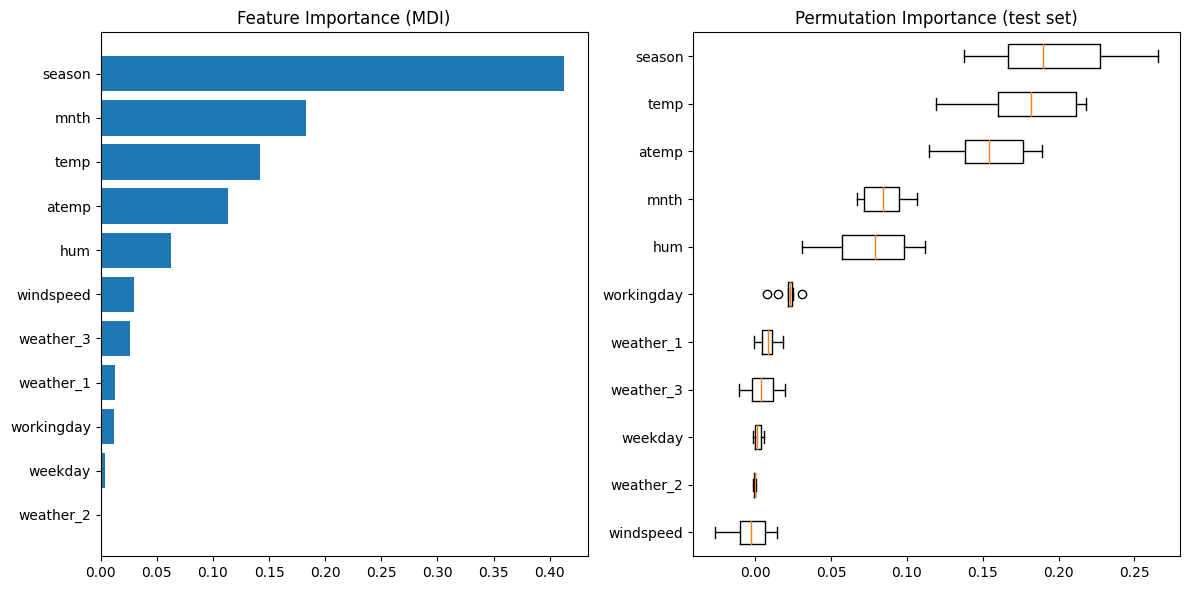

In [142]:
from sklearn.inspection import permutation_importance

feature_importance = model.feature_importances_

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_train.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

Root Mean Squared Logarithmic Error:  0.006596863988837524


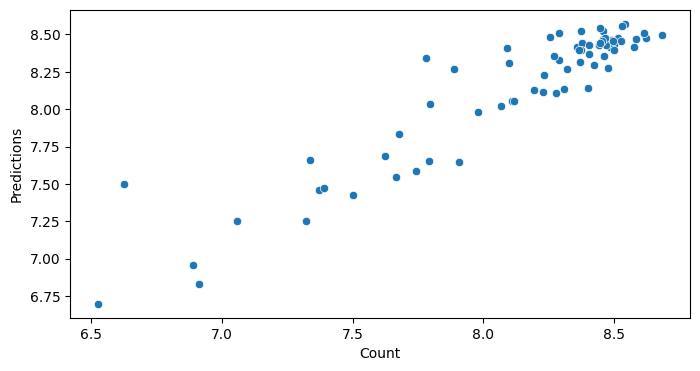

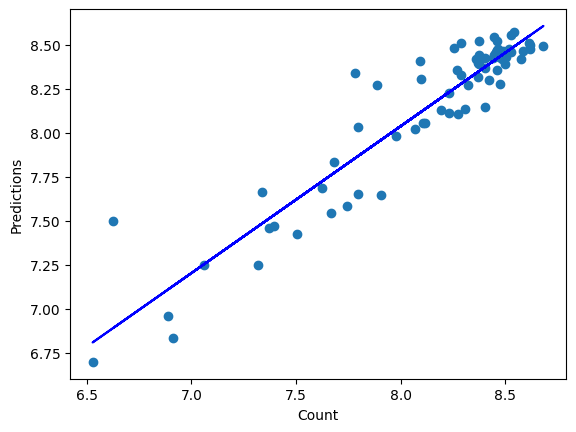

In [162]:
pred = model.predict(X_test)

y_test = np.array(y_test) if isinstance(y_test, pd.Series) else y_test
pred = np.array(pred) if isinstance(pred, pd.Series) else pred
print('Root Mean Squared Logarithmic Error: ', rmsle(y_test, pred, False))

plt.figure(figsize = (8,4))
sns.scatterplot(x=y_test, y=pred)
plt.xlabel('Count')
plt.ylabel('Predictions')
plt.show()

############################ TEST ######################################
reg_y_test = y_test.reshape(-1, 1)
reg_pred = pred.reshape(-1, 1)
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(reg_y_test, reg_pred)

plt.xlabel("Count")
plt.ylabel("Predictions")
plt.scatter(reg_y_test, reg_pred)
plt.plot(reg_y_test, reg.predict(reg_y_test), color='blue')

In [172]:
#submission
pred = model.predict(test_df)
pred = reg.predict(pred.reshape(-1, 1))
# transform the predictions back to the original scale
pred = np.round(np.exp(pred)).astype(int)
pred = np.concatenate(pred))
submission = pd.DataFrame({'id': test['id'],
                           'cnt': pred}
                          )
submission.to_csv('submission.csv',index=False)


[1541 1417 1587 1658 2054 1997 2285 1816 1434 1957 1480 1925 1845 1342
 1226 1279 1322 1650 1655 1488  901  906 1078 1591 1880 1666 1725 1802
 1657 1915 2377 2957 2495 2221 1943 1732 2123 2345 2084 2156 2188 1201
 1331 2063 2248 2230 2062 2259 2061 1756 1827 2093 2660 2917 2419 1829
 1964 2204 2239 1941 2991 2279 2751 1852 2023 2182 2478 2836 2314 2030
 2011 3096 3039 3157 3097 2761 3030 2772 2967 3059 3721 3818 3713 3363
 2463 2508 2610 3814 3828 2582 2598 2835 3121 4547 4329 3313 3230 3312
 4119 3796 3254 2797 3174 3359 4334 4289 4234 4421 3545 4446 4150 4165
 1375 2066 3146 4357 3619 2757 2628 3339 3666 4208 4387 4146 4462 4348
 4117 4033 3535 3816 4306 4622 4870 4516 3901 4214 4586 4309 4567 5322
 4526 3710 4319 4561 4446 4501 4569 4286 4372 4136 4331 4700 4027 4435
 4674 4382 4108 4815 4656 4756 4893 4665 4351 4030 4193 4534 4615 4715
 4341 4050 4485 4371 4343 4358 4715 4630 4511 4400 4701 4580 4084 4605
 4217 4606 4625 4308 4130 4204 3976 4100 4204 4261 4600 4627 4940 4357
 4324 

ValueError: Per-column arrays must each be 1-dimensional

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 328
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   weather_1   354 non-null    boolean 
 1   weather_2   354 non-null    boolean 
 2   weather_3   354 non-null    boolean 
 3   season      354 non-null    category
 4   mnth        354 non-null    category
 5   weekday     354 non-null    category
 6   workingday  354 non-null    category
 7   temp        354 non-null    Float64 
 8   atemp       354 non-null    Float64 
 9   hum         354 non-null    Float64 
 10  windspeed   354 non-null    Float64 
 11  cnt         354 non-null    Int64   
dtypes: Float64(4), Int64(1), boolean(3), category(4)
memory usage: 22.8 KB
